In [199]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder, LabelEncoder


In [200]:
df=pd.read_csv("league.csv")

In [201]:
df.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,A,58.25,6.52,49.97%,94.62%,4.43%,2.03%,1.97
1,Ahri,Mage,MID,A,53.21,-0.24,49.93%,93.47%,4.62%,1.04%,2.56
2,Akali,Assassin,MID,S,65.30,6.51,48.59%,65.65%,8.16%,12.88%,2.34
3,Akali,Assassin,TOP,A,57.87,3.34,48.57%,34.06%,4.24%,12.88%,2.04
4,Akshan,Marksman,MID,S,59.85,0.65,51.46%,58.01%,4.83%,21.91%,2.23


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5544 entries, 0 to 5543
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    5544 non-null   object 
 1   Class   5544 non-null   object 
 2   Role    5544 non-null   object 
 3   Tier    5544 non-null   object 
 4   Score   5544 non-null   float64
 5   Trend   5544 non-null   float64
 6   Win %   5544 non-null   object 
 7   Role %  5544 non-null   object 
 8   Pick %  5544 non-null   object 
 9   Ban %   5544 non-null   object 
 10  KDA     5544 non-null   float64
dtypes: float64(3), object(8)
memory usage: 476.6+ KB


In [203]:
dfnull=df["Class"].isnull()

In [204]:
dfnull

0       False
1       False
2       False
3       False
4       False
        ...  
5539    False
5540    False
5541    False
5542    False
5543    False
Name: Class, Length: 5544, dtype: bool

In [205]:
df.describe()

,Score,Trend,KDA
count,5544.000000,5544.000000,5544.000000
mean,50.000049,-0.033120,2.329205
std,14.498281,6.203694,0.410395
min,3.490000,-38.440000,1.030000
25%,40.737500,-2.740000,2.050000
50%,47.425000,-0.155000,2.310000
75%,56.435000,2.400000,2.560000
max,97.420000,64.580000,4.400000


In [206]:
df.isnull().value_counts()

Name   Class  Role   Tier   Score  Trend  Win %  Role %  Pick %  Ban %  KDA  
False  False  False  False  False  False  False  False   False   False  False    5544
Name: count, dtype: int64

In [207]:
df[["Tier"]]

,Tier
0,A
1,A
2,S
3,A
4,S
...,...
5539,C
5540,A
5541,A
5542,A


In [208]:
od=OrdinalEncoder()
od.fit_transform(df[["Tier"]])

array([[0.],
       [0.],
       [5.],
       ...,
       [0.],
       [0.],
       [1.]])

In [209]:
# Define the categorical order
tier_order = ['F', 'D', 'C', 'B', 'A', 'S', 'God']
df['Tier'] = pd.Categorical(df['Tier'], categories=tier_order, ordered=True)
df['Tier'] = df['Tier'].cat.codes

In [210]:
od=LabelEncoder()

In [211]:
df["Role"]=od.fit_transform(df["Role"])
df["Class"]=od.fit_transform(df["Class"])
df["Name"]=od.fit_transform(df["Name"])

In [212]:
df['Win %'] = df['Win %'].str.replace('%', '', regex=True)
df['Role %'] = df['Role %'].str.replace('%', '', regex=True)
df['Pick %'] = df['Pick %'].str.replace('%', '', regex=True)
df['Ban %'] = df['Ban %'].str.replace('%', '', regex=True)

In [213]:
df.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,0,1,4,4,58.25,6.52,49.97,94.62,4.43,2.03,1.97
1,1,2,2,4,53.21,-0.24,49.93,93.47,4.62,1.04,2.56
2,2,0,2,5,65.30,6.51,48.59,65.65,8.16,12.88,2.34
3,2,0,4,4,57.87,3.34,48.57,34.06,4.24,12.88,2.04
4,3,3,2,5,59.85,0.65,51.46,58.01,4.83,21.91,2.23


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5544 entries, 0 to 5543
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    5544 non-null   int64  
 1   Class   5544 non-null   int64  
 2   Role    5544 non-null   int64  
 3   Tier    5544 non-null   int8   
 4   Score   5544 non-null   float64
 5   Trend   5544 non-null   float64
 6   Win %   5544 non-null   object 
 7   Role %  5544 non-null   object 
 8   Pick %  5544 non-null   object 
 9   Ban %   5544 non-null   object 
 10  KDA     5544 non-null   float64
dtypes: float64(3), int64(3), int8(1), object(4)
memory usage: 438.7+ KB


In [215]:
df["Win %"]=df["Win %"].astype("float")
df["Role %"]=df["Role %"].astype("float")
df["Ban %"]=df["Ban %"].astype("float")
df["Pick %"]=df["Pick %"].astype("float")

In [216]:
df.describe()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
count,5544.000000,5544.000000,5544.000000,5544.000000,5544.000000,5544.000000,5544.000000,5544.000000,5544.000000,5544.000000,5544.000000
mean,82.747655,2.167569,2.247475,3.486833,50.000049,-0.033120,50.160218,62.145583,3.956757,5.517664,2.329205
std,46.912707,1.514934,1.337807,1.432531,14.498281,6.203694,1.932179,31.731903,3.602729,7.072691,0.410395
min,0.000000,0.000000,0.000000,1.000000,3.490000,-38.440000,40.640000,10.030000,0.040000,0.110000,1.030000
25%,41.000000,1.000000,1.000000,2.000000,40.737500,-2.740000,49.050000,27.292500,1.310000,0.860000,2.050000
50%,84.000000,2.000000,2.000000,3.000000,47.425000,-0.155000,50.270000,75.000000,2.870000,2.710000,2.310000
75%,123.000000,3.000000,3.250000,4.000000,56.435000,2.400000,51.410000,91.320000,5.492500,6.920000,2.560000
max,161.000000,5.000000,4.000000,6.000000,97.420000,64.580000,62.070000,99.760000,24.830000,61.410000,4.400000


#### EDA    

In [217]:
scaler=MinMaxScaler(feature_range=(0,1))
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

<Axes: >

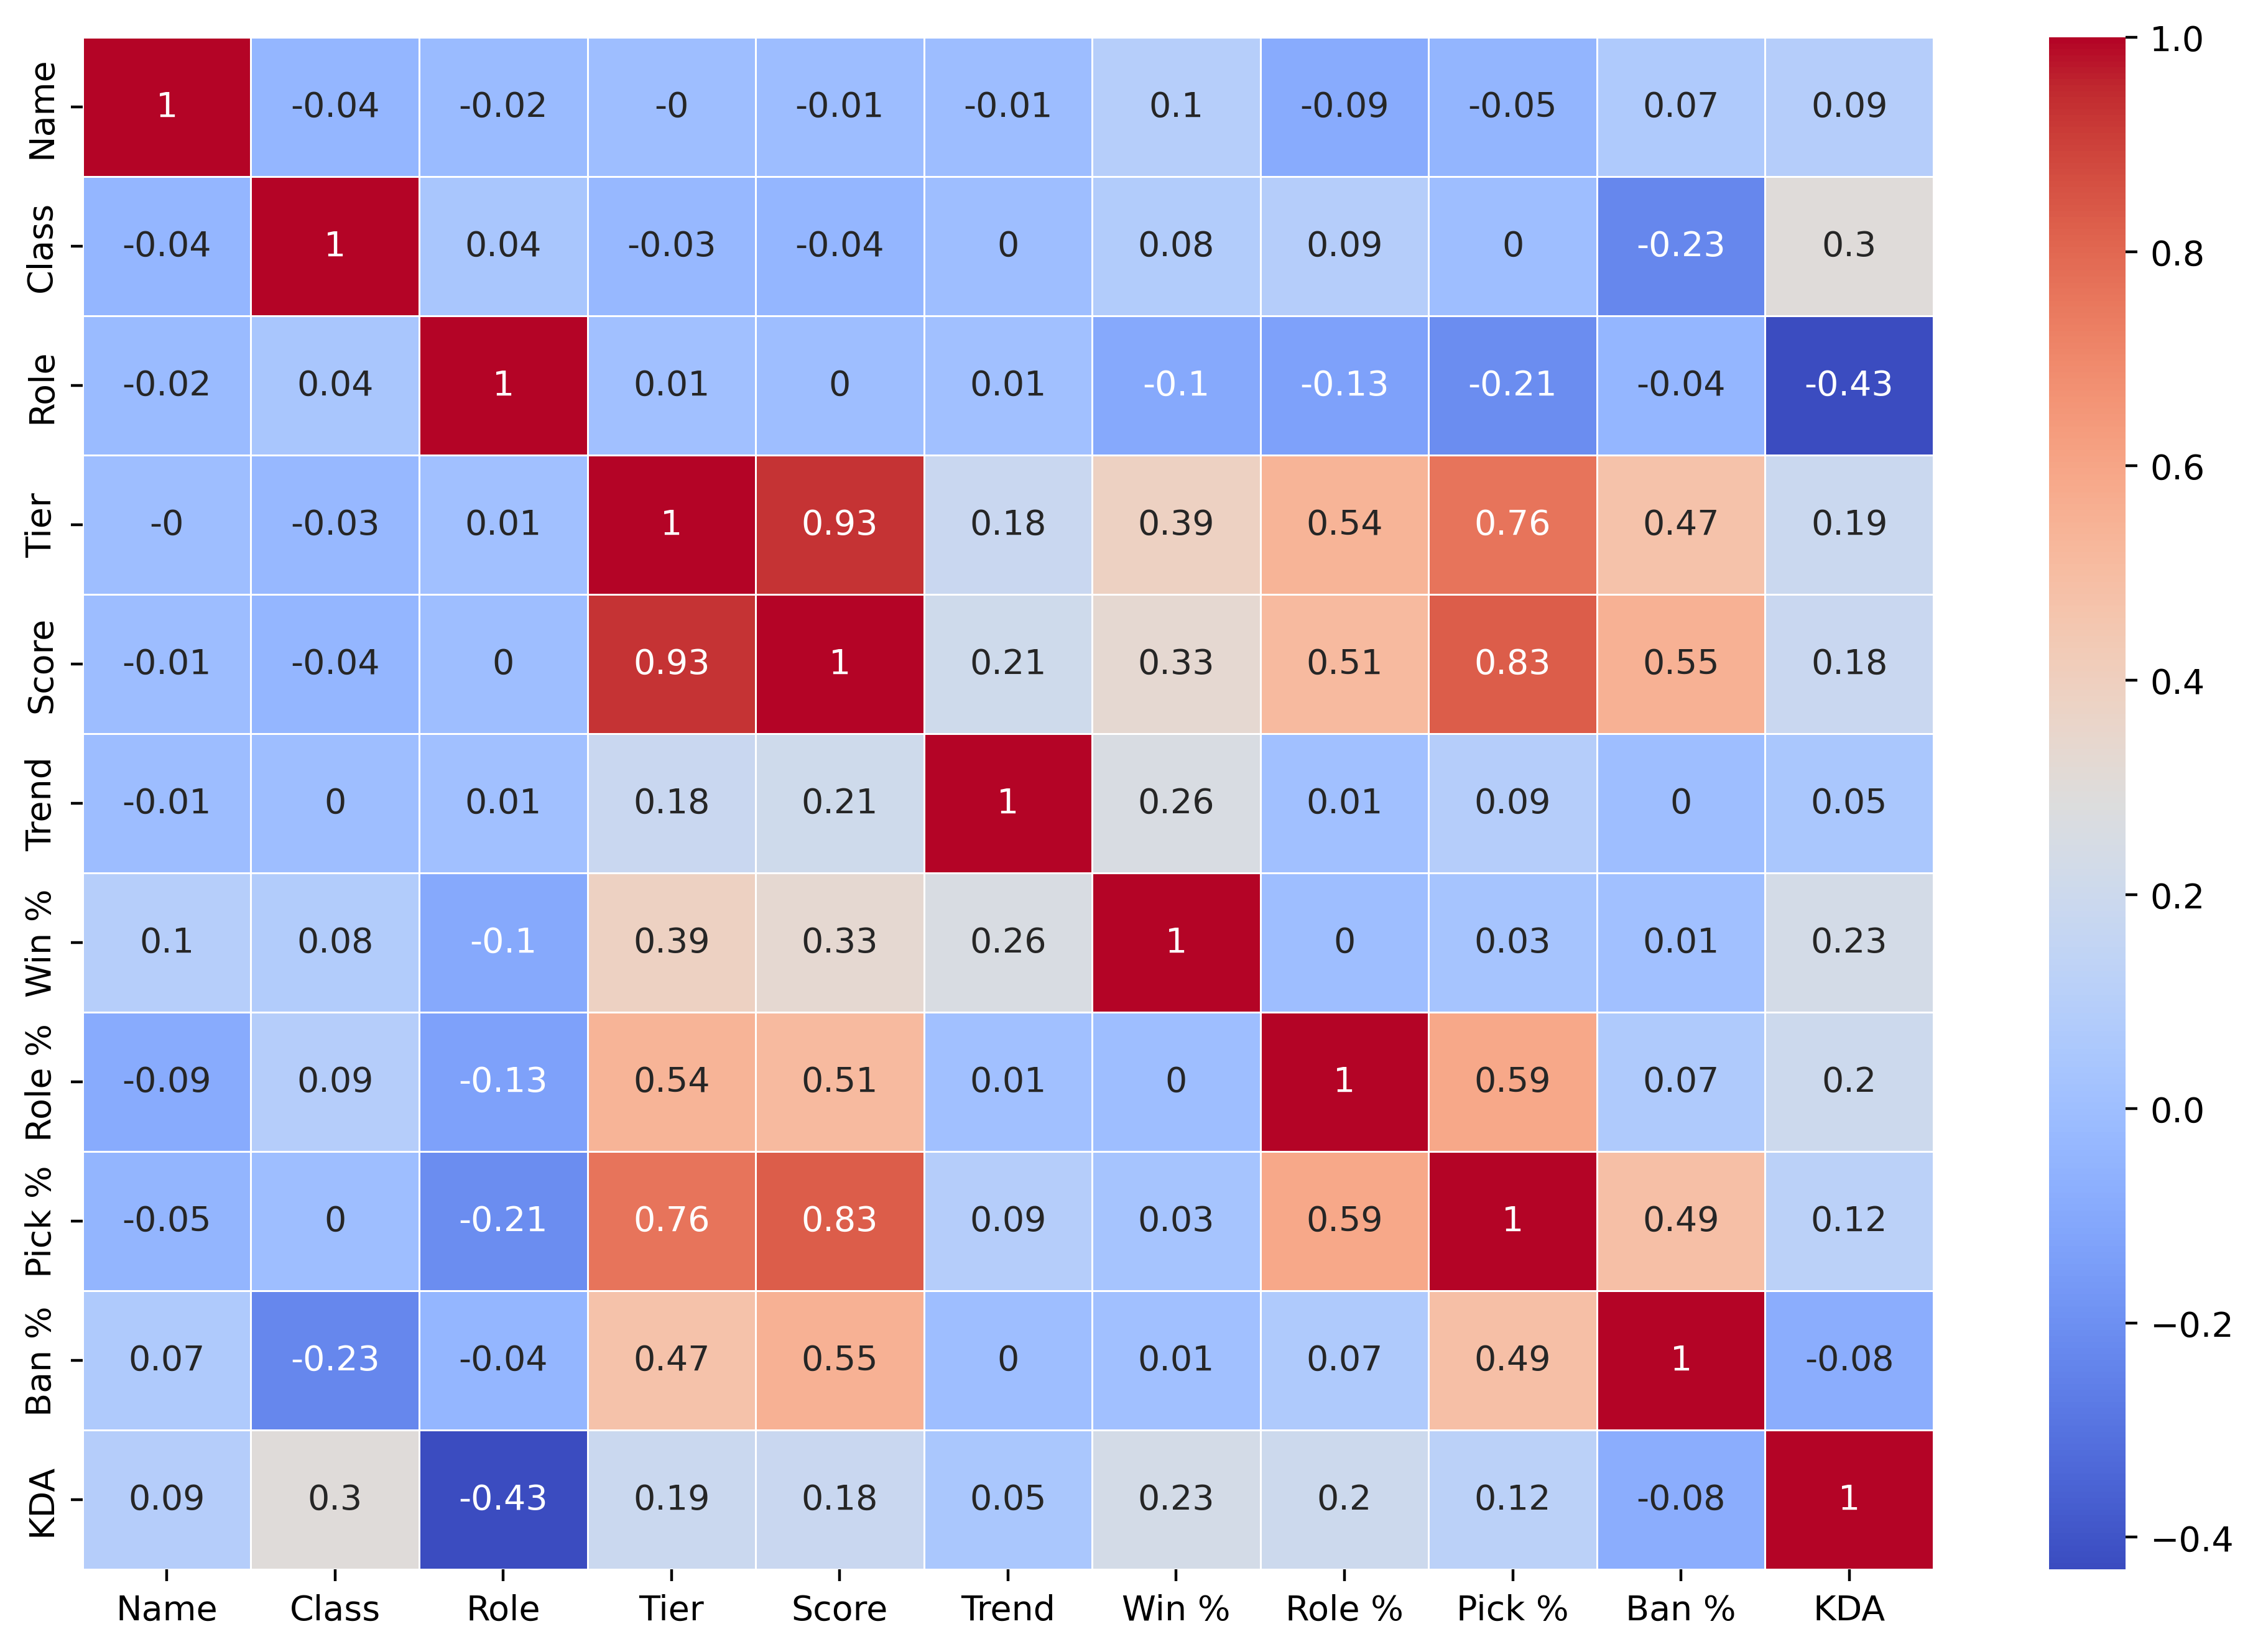

In [218]:
plt.figure(figsize=(12,8),dpi=400)
sns.heatmap(df.corr().round(2), annot=True, cmap='coolwarm', linewidths=0.5)

#### Initial Analysis

**Score and Tier** 

The heatmap shows a strong positive correlation between Score and Tier. A champion with a relatively high score will have better initial stats than other champions people will choose to play this champion over others, moving it to a high tier. 

**Pick and Tier**

This also explains the strong correlation between the Pick rate and the Tier. Since a higher Tier means that it suits the current trend of the game, people will favor it over other champions in lower tiers.

**Score and Pick**

People want to play champions which are stronger than others, so champions with hgiher scores will attract players more than champions with lower scores.

However, it is important to note that personal preferences plays an important role when it comes to pick, because people have specific champions that they enjoy playing regardless of their popularity.


In [219]:
X=df.drop("Pick %",axis=1)
y=df["Pick %"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
ypred=model.predict(X_test)
r2=r2_score(y_test,ypred)
rmse=mean_squared_error(y_test,ypred)**0.5
print("r2: ",r2,"rmse: ",rmse)

In [ ]:
model = RandomForestRegressor()
model.fit(X_train,y_train)
ypred=model.predict(X_test)
r2=r2_score(y_test,ypred)
rmse=mean_squared_error(y_test,ypred)**0.5
print("r2: ",r2,"rmse: ",rmse)